# Pytorch Basic

## 1. Boston Housing Price - Linear Regression

### 1) 데이터셋

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')

boston.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [22]:
df = boston.rename(columns={'medv' : 'target'})

df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


### 2) 데이터 처리

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [27]:
# target : 집값
# indus : 비소매상업지역 면적 비율
# rm : 주택당 방 수
# lstat : 인구 중 하위 계층 비율
# nox : 일산화질소 농도
# dis : 직업센터와의 거리
cols = ['target', 'indus', 'rm', 'lstat', 'nox', 'dis']

data = torch.from_numpy(df[cols].values).float() # numpy to float

data.shape

torch.Size([506, 6])

In [28]:
data

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [30]:
# 특성과 라벨로 분리
y = data[:, :1] # 첫 번째 컬럼의 값 (target)
x = data[:, 1:] # 두 번째 컬럼부터 나머지 컬럼까지의 값 (feature)

x.shape, y.shape

(torch.Size([506, 5]), torch.Size([506, 1]))

### 3) 학습

In [31]:
# hyperparameter
n_epochs = 2000
learning_rate = 1e-3  # 0.001
print_interval = 100

In [32]:
# model
model = nn.Linear(x.size(-1), y.size(-1))   # x.size(-1) = 5, y.size(-1) = 1
model

Linear(in_features=5, out_features=1, bias=True)

In [34]:
# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
# training
for i in range(n_epochs) :
  y_hat = model(x)  # 예측값
  loss = F.mse_loss(y_hat, y)   # mean squar error

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_interval == 0 :
    print('Epoch %d : loss=%.4e' % (i+1, loss))

Epoch 100 : loss=4.3515e+01
Epoch 200 : loss=3.7082e+01
Epoch 300 : loss=3.3528e+01
Epoch 400 : loss=3.1525e+01
Epoch 500 : loss=3.0396e+01
Epoch 600 : loss=2.9760e+01
Epoch 700 : loss=2.9401e+01
Epoch 800 : loss=2.9198e+01
Epoch 900 : loss=2.9084e+01
Epoch 1000 : loss=2.9019e+01
Epoch 1100 : loss=2.8982e+01
Epoch 1200 : loss=2.8961e+01
Epoch 1300 : loss=2.8949e+01
Epoch 1400 : loss=2.8942e+01
Epoch 1500 : loss=2.8938e+01
Epoch 1600 : loss=2.8935e+01
Epoch 1700 : loss=2.8933e+01
Epoch 1800 : loss=2.8932e+01
Epoch 1900 : loss=2.8931e+01
Epoch 2000 : loss=2.8930e+01


### 4) 학습 결과 정리

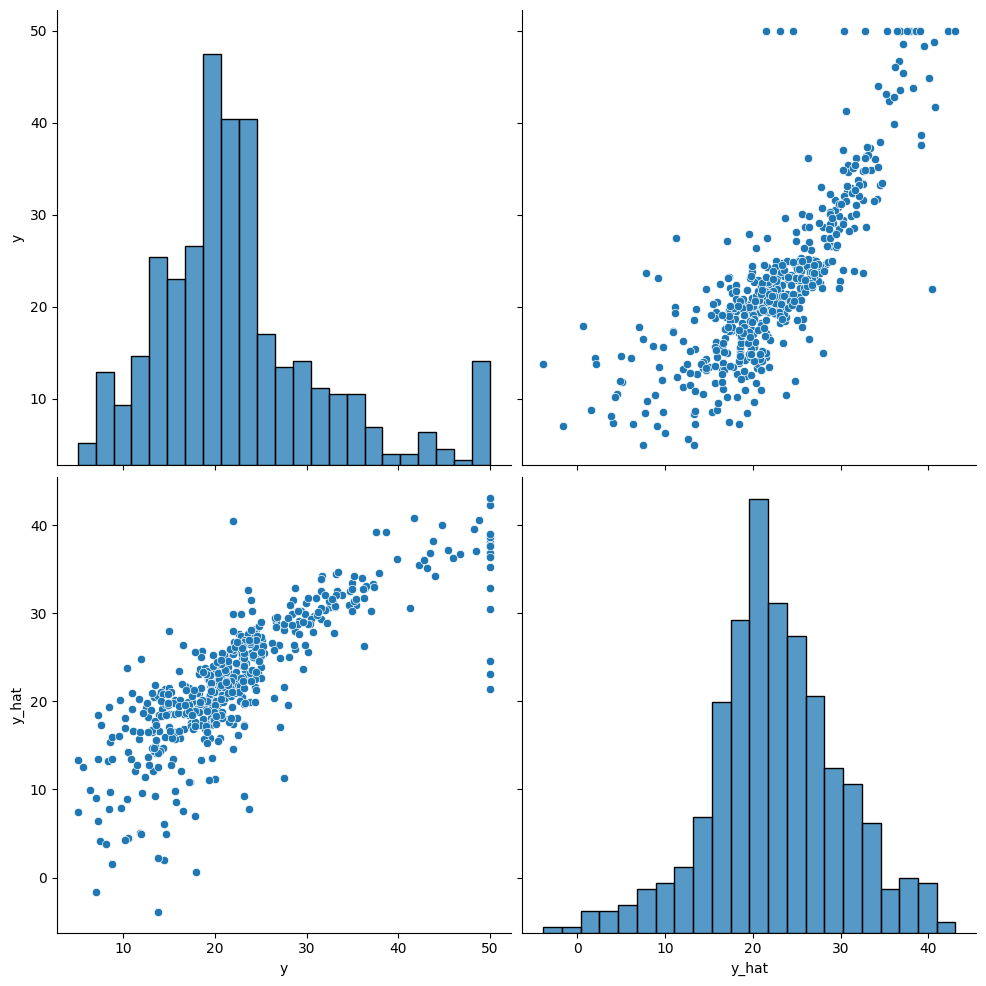

In [36]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=['y','y_hat'])

sns.pairplot(df, height=5)
plt.show()

## 2. Breast Cancer

### 1) 데이터셋

In [38]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [40]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### 2) 데이터 확인

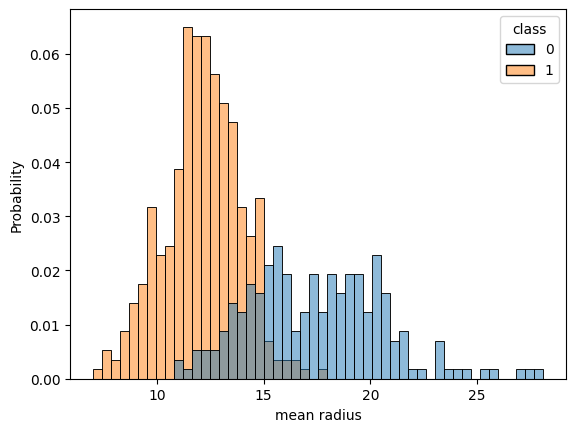

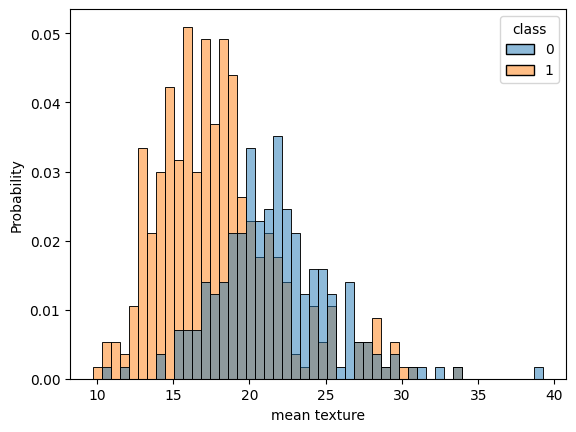

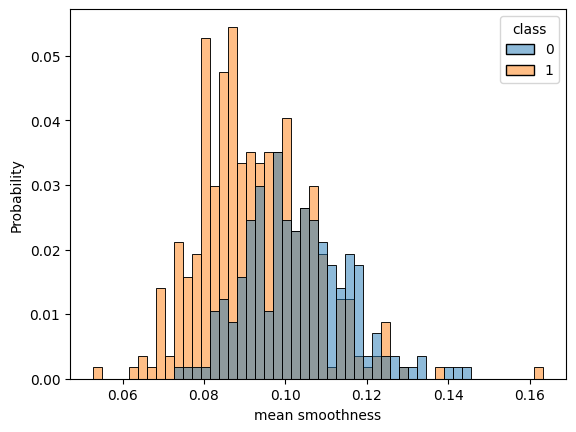

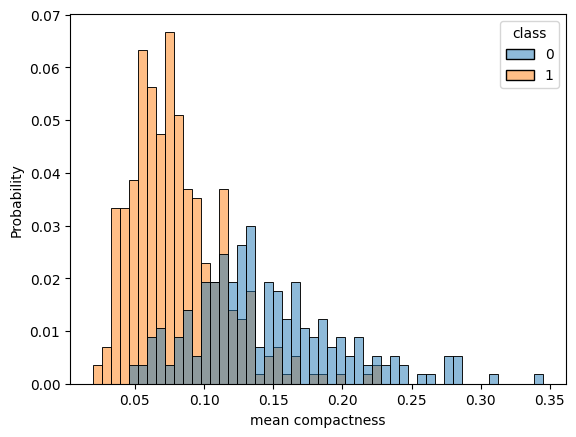

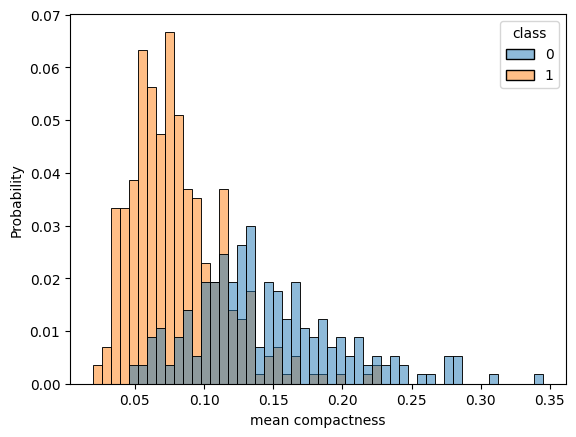

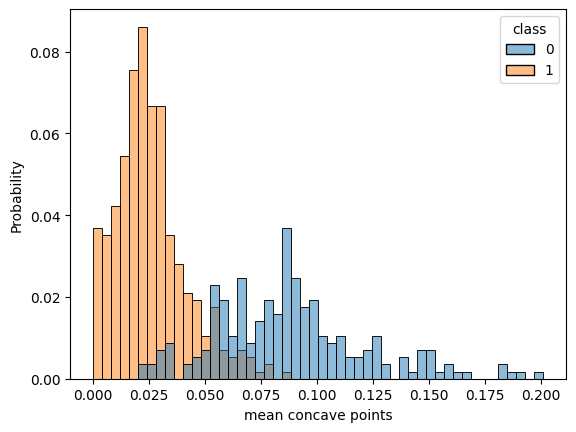

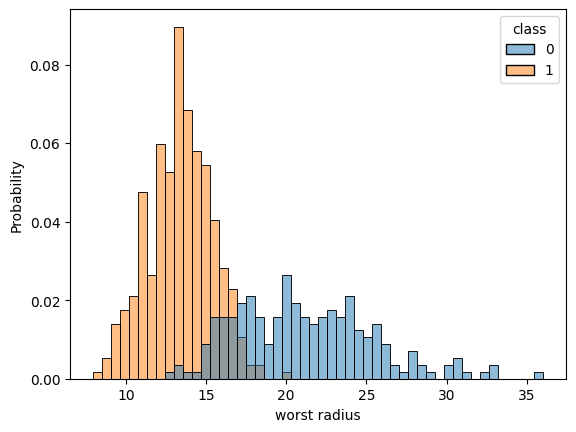

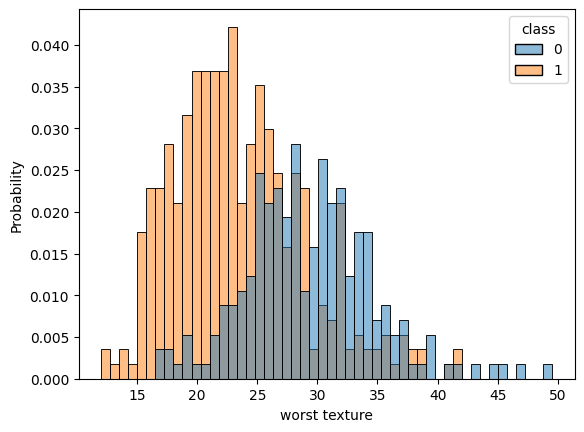

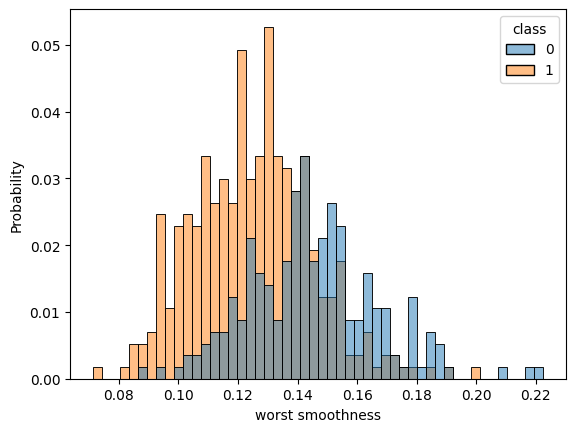

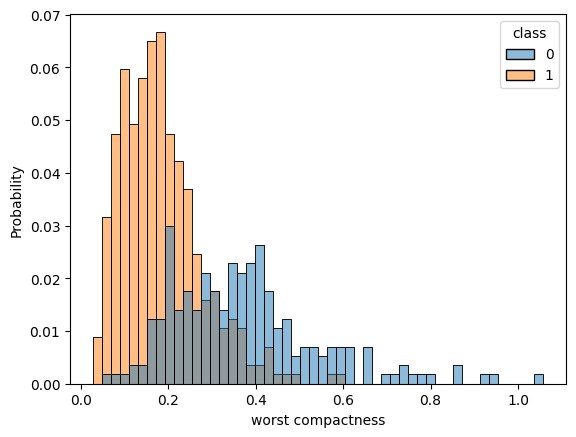

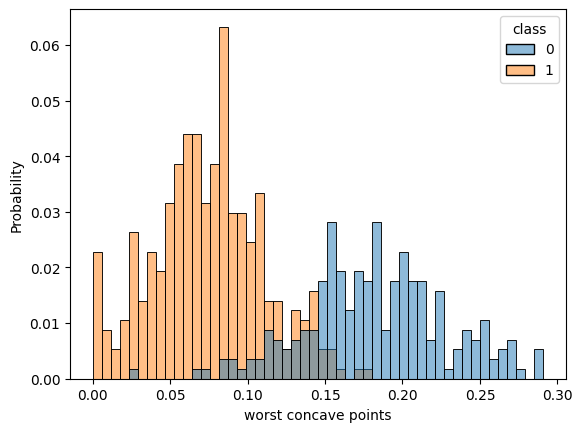

In [41]:
cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
        'mean compactness', 'mean concave points', 'worst radius', 'worst texture',
        'worst smoothness', 'worst compactness', 'worst concave points', 'class']

for c in cols[:-1] :
  sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
  plt.show()

### 3) 학습

In [42]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([569, 12])

In [43]:
# 라벨, 특성 분리
x = data[:, :-1]  # feature
y = data[:, -1:]  # target (class)

x.shape, y.shape

(torch.Size([569, 11]), torch.Size([569, 1]))

In [55]:
# hyperparameter
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [56]:
# model structure
class MyModel(nn.Module) :

  def __init__(self, input_dim, output_dim) :
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear = nn.Linear(input_dim, output_dim)
    self.act = nn.Sigmoid() # activation function

  def forward(self, x) :
    y = self.act(self.linear(x))

    return y

In [60]:
# model
model = MyModel(input_dim=x.size(-1),   # input data size = 11
                output_dim=y.size(-1))  # output data size = 1

# loss function
crit = nn.BCELoss()   # Binary Cross Entropy

# optimizer
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [61]:
# training
for i in range(n_epochs) :
  y_hat = model(x)
  loss = crit(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_interval == 0 :
    print('Epoch %d : loss=%.4e' % (i+1, loss))

Epoch 10000 : loss=2.8092e-01
Epoch 20000 : loss=2.3023e-01
Epoch 30000 : loss=2.0026e-01
Epoch 40000 : loss=1.8083e-01
Epoch 50000 : loss=1.6733e-01
Epoch 60000 : loss=1.5743e-01
Epoch 70000 : loss=1.4986e-01
Epoch 80000 : loss=1.4388e-01
Epoch 90000 : loss=1.3904e-01
Epoch 100000 : loss=1.3502e-01
Epoch 110000 : loss=1.3165e-01
Epoch 120000 : loss=1.2876e-01
Epoch 130000 : loss=1.2626e-01
Epoch 140000 : loss=1.2408e-01
Epoch 150000 : loss=1.2215e-01
Epoch 160000 : loss=1.2044e-01
Epoch 170000 : loss=1.1890e-01
Epoch 180000 : loss=1.1751e-01
Epoch 190000 : loss=1.1626e-01
Epoch 200000 : loss=1.1510e-01


### 4) 정확도 확인(accuracy)

In [62]:
 correct_cnt = (y == (y_hat > .5)).sum()
 total_cnt = float(y.size(0))

 print('Accuracy : %.4f' % (correct_cnt / total_cnt))

Accuracy : 0.9649


### 5) 예측값의 분포 확인

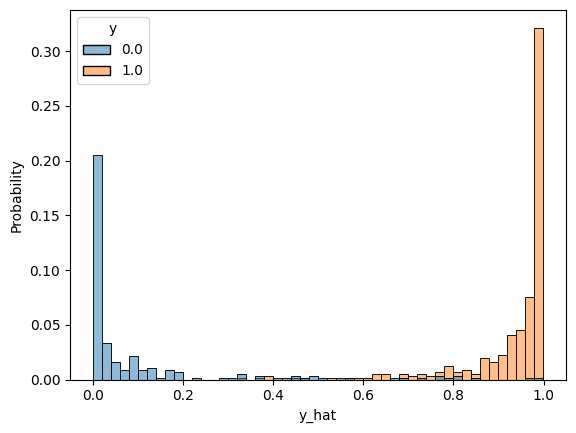

In [63]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()